# INCLUDING LIBRARIES

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [249]:
import warnings
warnings.filterwarnings("ignore")

In [250]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# READING DATA

In [251]:
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")

# merging both train and test data for preprocessing
df = df_train.append(df_test)

df.drop(columns=['url'],inplace=True)
pd.set_option("display.max_columns",None)
df.head()

,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,framebased,frameTagRatio,domainLink,tagRatio,imageTagRatio,isNews,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,"{""title"":""Join Polyvore and follow the latest ...",?,?,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,0.0,0,0.027778,0,0.203161,3.120000,?,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,"{""body"":""Speed Air Man--David Belle david bell...",?,?,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,0.1,0,0.015086,0,0.168189,13.100000,?,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,0.0,0,0.033935,0,0.192652,0.126582,1,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,0.0,0,0.036530,0,0.198000,0.135593,1,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,0.0,0,0.015152,0,0.241564,0.054217,?,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


1    3060
0    2856
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

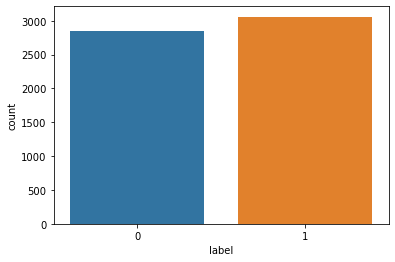

In [252]:
print(df_train["label"].value_counts())
sns.countplot(x='label',data=df_train)

# PRE-PROCESSING

### Working On Missing Data

In [253]:
df['alchemy_category_score'] = df['alchemy_category_score'].replace('?','2')

df = df.replace('?',np.NaN)
df.head()

,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,framebased,frameTagRatio,domainLink,tagRatio,imageTagRatio,isNews,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,"{""title"":""Join Polyvore and follow the latest ...",NaN,2,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,0.0,0,0.027778,0,0.203161,3.120000,NaN,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,"{""body"":""Speed Air Man--David Belle david bell...",NaN,2,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,0.1,0,0.015086,0,0.168189,13.100000,NaN,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,0.0,0,0.033935,0,0.192652,0.126582,1,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,0.0,0,0.036530,0,0.198000,0.135593,1,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,0.0,0,0.015152,0,0.241564,0.054217,NaN,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


In [254]:
def get_missing_data():
    Missing_Data = df.isnull().sum().nlargest(5)
    Missing_Data_precentage = ((df.isnull().sum()/df.isnull().count())*100).nlargest(5)
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

In [255]:
def countplot_graph(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [256]:
get_missing_data()

,Missing_Data,Percentage
isNews,2843,38.444895
alchemy_category,2342,31.670047
label,1479,20.000000
isFrontPageNews,1248,16.876268
webpageDescription,0,0.000000


In [257]:
df['isNews'].unique()

array([nan, '1'], dtype=object)

In [258]:
df.drop(columns=['isNews'],inplace=True)

In [259]:
df['isFrontPageNews'].unique()

array(['0', nan, '1'], dtype=object)

0    5853
1     294
Name: isFrontPageNews, dtype: int64


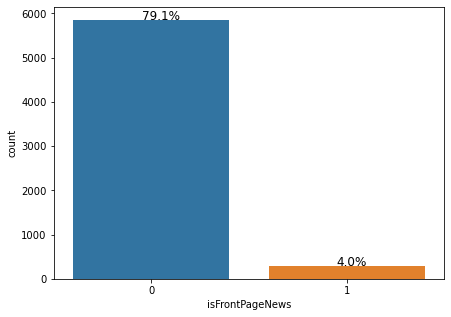

In [260]:
print(df['isFrontPageNews'].value_counts())
plt.figure(figsize = (7,5))
graph = sns.countplot(x='isFrontPageNews', data=df)
countplot_graph(graph, df.isFrontPageNews)

In [261]:
df['isFrontPageNews'] = df['isFrontPageNews'].fillna(0)
df['isFrontPageNews'] = df['isFrontPageNews'].astype('float').astype('Int64')

In [262]:
get_missing_data()

,Missing_Data,Percentage
alchemy_category,2342,31.670047
label,1479,20.000000
webpageDescription,0,0.000000
alchemy_category_score,0,0.000000
avgLinkWordLength,0,0.000000


In [263]:
df['alchemy_category_score'].unique()

array(['2', '0.386685', '0.475039', ..., '0.681418', '0.943693',
       '0.715035'], dtype=object)

In [264]:
df['alchemy_category_score'] = df.alchemy_category_score.astype(float)
df['alchemy_category_score'] = df['alchemy_category_score'].replace(2,np.NaN)
df['alchemy_category_score'].unique()

array([     nan, 0.386685, 0.475039, ..., 0.681418, 0.943693, 0.715035])

In [265]:
get_missing_data()

,Missing_Data,Percentage
alchemy_category,2342,31.670047
alchemy_category_score,2342,31.670047
label,1479,20.000000
webpageDescription,0,0.000000
avgLinkWordLength,0,0.000000


In [266]:
column_name = ['alchemy_category_score']
df[column_name].describe()

,alchemy_category_score
count,5053.000000
mean,0.603334
std,0.212864
min,0.070833
25%,0.452424
50%,0.625616
75%,0.780851
max,0.999426


In [267]:
df["alchemy_category_score"].fillna(df["alchemy_category_score"].median(), inplace=True)
get_missing_data()

,Missing_Data,Percentage
alchemy_category,2342,31.670047
label,1479,20.000000
webpageDescription,0,0.000000
alchemy_category_score,0,0.000000
avgLinkWordLength,0,0.000000


In [268]:
df['alchemy_category'].value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [269]:
df['alchemy_category'] = df['alchemy_category'].replace(np.NaN,'unknown')
df['alchemy_category'].value_counts()

unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

In [270]:
get_missing_data()

,Missing_Data,Percentage
label,1479,20.0
webpageDescription,0,0.0
alchemy_category,0,0.0
alchemy_category_score,0,0.0
avgLinkWordLength,0,0.0


### Label Encoding

In [271]:
# column_for_one_hot = ["alchemy_category"]
# df = pd.get_dummies(df, columns=column_for_one_hot)
# df.head()

In [272]:
df['alchemy_category'] = LabelEncoder().fit_transform(df['alchemy_category'])
df.head()

,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,framebased,frameTagRatio,domainLink,tagRatio,imageTagRatio,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,"{""title"":""Join Polyvore and follow the latest ...",11,0.625616,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,0.0,0,0.027778,0,0.203161,3.120000,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,"{""body"":""Speed Air Man--David Belle david bell...",11,0.625616,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,0.1,0,0.015086,0,0.168189,13.100000,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",9,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,0.0,0,0.033935,0,0.192652,0.126582,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",7,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,0.0,0,0.036530,0,0.198000,0.135593,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,"{""url"":""recipes wuzzle org index php 72"",""titl...",2,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,0.0,0,0.015152,0,0.241564,0.054217,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


### DATA

In [273]:
print(df["framebased"].value_counts())
df.drop(columns=['framebased'],inplace=True)

0    7395
Name: framebased, dtype: int64


In [274]:
df.head()

,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,frameTagRatio,domainLink,tagRatio,imageTagRatio,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,"{""title"":""Join Polyvore and follow the latest ...",11,0.625616,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,0.0,0.027778,0,0.203161,3.120000,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,"{""body"":""Speed Air Man--David Belle david bell...",11,0.625616,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,0.1,0.015086,0,0.168189,13.100000,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",9,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,0.0,0.033935,0,0.192652,0.126582,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",7,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,0.0,0.036530,0,0.198000,0.135593,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,"{""url"":""recipes wuzzle org index php 72"",""titl...",2,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,0.0,0.015152,0,0.241564,0.054217,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


<AxesSubplot:xlabel='frameTagRatio', ylabel='Count'>

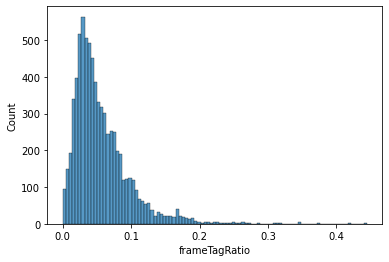

In [275]:
sns.histplot(df["frameTagRatio"])

### Outliers

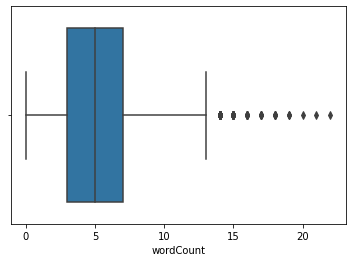

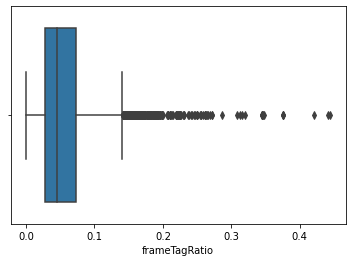

In [276]:
# plt.figure(12,10)
plt.show(sns.boxplot(x=df['wordCount']))
plt.show(sns.boxplot(x=df['frameTagRatio']))

<AxesSubplot:xlabel='wordCount'>

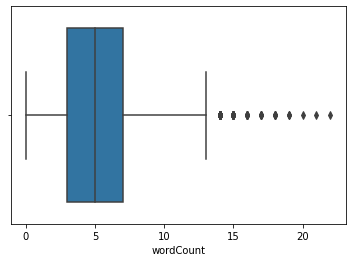

In [277]:
sns.boxplot(x=df['wordCount'])

0    7238
1     157
Name: domainLink, dtype: int64

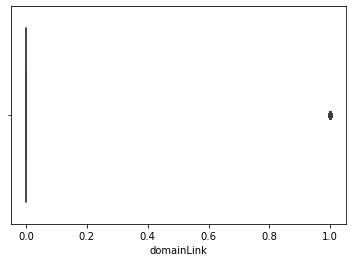

In [278]:
sns.boxplot(x=df['domainLink'])
df["domainLink"].value_counts()

In [279]:
df.describe()

,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,frameTagRatio,domainLink,tagRatio,imageTagRatio,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,5916.000000,7395.000000
mean,6.352535,0.610391,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,0.039757,5716.598242,178.754564,4.960649,0.172864,0.101221,0.517241,3697.000000
std,4.235302,0.176257,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,0.195400,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499745,2134.896953
min,0.000000,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.538758,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,0.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000,1848.500000
50%,7.000000,0.625616,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,0.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000,3697.000000
75%,11.000000,0.708279,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,0.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000,5545.500000
max,12.000000,0.999426,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,1.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000,7394.000000


In [280]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [281]:
# df.columns

In [282]:
column_index = []
for i in range(0, len(df.columns)):
    column_index.append(i)

remove_columns = ['webpageDescription', 'embedRatio', 'domainLink', 'isFrontPageNews', 'label', 'id']
index_number_to_remove = []
for col in remove_columns:
    index_number_to_remove.append(df.columns.get_loc(col))

for index in index_number_to_remove:
    column_index.remove(index)
column_index


[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21]

In [283]:
df.columns

Index(['webpageDescription', 'alchemy_category', 'alchemy_category_score',
       'avgLinkWordLength', 'AvglinkWithOneCommonWord',
       'AvglinkWithTwoCommonWord', 'AvglinkWithThreeCommonWord',
       'AvglinkWithFourCommonWord', 'redundancyMeasure', 'embedRatio',
       'frameTagRatio', 'domainLink', 'tagRatio', 'imageTagRatio',
       'lengthyDomain', 'hyperlinkToAllWordsRatio', 'isFrontPageNews',
       'alphanumCharCount', 'linksCount', 'wordCount', 'parametrizedLinkRatio',
       'spellingErrorsRatio', 'label', 'id'],
      dtype='object')

In [284]:
for i in range(1, 21):
    column = df.iloc[:,i]
    # print(column.name)
    column_outlier_class = OutlierRemoval(column.quantile(0.25), column.quantile(0.75))
    outlier_removed_column = column.apply(column_outlier_class.removeOutlier)
    df[column.name] = outlier_removed_column

In [285]:
df.describe()

,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,frameTagRatio,domainLink,tagRatio,imageTagRatio,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,5916.000000,7395.000000
mean,6.352535,0.615594,2.176219,0.468230,0.212331,0.088043,0.043010,0.524811,0.0,0.054424,0.0,0.232441,0.137541,0.660311,30.016092,0.0,4607.409060,165.698445,4.932792,0.163620,0.101221,0.517241,3697.000000
std,4.235302,0.163642,0.867536,0.203133,0.141050,0.081027,0.051346,0.129993,0.0,0.034233,0.0,0.047146,0.223536,0.473636,20.209054,0.0,3928.891421,115.162445,3.146749,0.155792,0.079231,0.499745,2134.896953
min,0.000000,0.284475,0.063979,0.000000,0.000000,0.000000,0.000000,0.239200,0.0,0.000000,0.0,0.111499,-0.290300,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.538758,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.0,0.028502,0.0,0.201061,0.025900,0.000000,14.000000,0.0,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000,1848.500000
50%,7.000000,0.625616,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.0,0.045775,0.0,0.230564,0.083051,1.000000,25.000000,0.0,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000,3697.000000
75%,11.000000,0.708279,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.0,0.073459,0.0,0.260770,0.236700,1.000000,43.000000,0.0,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000,5545.500000
max,12.000000,0.962561,4.165534,1.000000,0.592105,0.300000,0.162662,0.781643,0.0,0.140893,0.0,0.350332,0.552900,1.000000,86.500000,0.0,13574.000000,432.000000,13.000000,0.541771,1.000000,1.000000,7394.000000


## NLP

In [286]:
columns = ['label', 'webpageDescription']
df_nlp = df[columns]
df_nlp.head()

,label,webpageDescription
0,1.0,"{""title"":""Join Polyvore and follow the latest ..."
1,1.0,"{""body"":""Speed Air Man--David Belle david bell..."
2,1.0,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi..."
3,1.0,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",..."
4,1.0,"{""url"":""recipes wuzzle org index php 72"",""titl..."


### Remove Punctuation, Tokenization, Remove Stopwords and Lemmatizing

In [287]:
import string
import re
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def nlp_func(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    # text = [ps.stem(word) for word in tokens if word not in stopword]
    text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    return text

# Coorelation :-

In [288]:
df_of_id_label = df[['id', 'label']]

In [289]:
print(df["embedRatio"].value_counts())
print(df["domainLink"].value_counts())
print(df["isFrontPageNews"].value_counts())
df.drop(columns=['embedRatio'],inplace=True)
df.drop(columns=['domainLink'],inplace=True)
df.drop(columns=['isFrontPageNews'],inplace=True)

0.0    7395
Name: embedRatio, dtype: int64
0.0    7395
Name: domainLink, dtype: int64
0.0    7395
Name: isFrontPageNews, dtype: int64


In [290]:
df.drop(columns=['id'],inplace=True)

In [291]:
correlation_matrix = abs(df.corr())
correlation_target = correlation_matrix["label"]
pd.set_option("display.max_rows",None)
correlation_target

alchemy_category              0.007326
alchemy_category_score        0.060706
avgLinkWordLength             0.047644
AvglinkWithOneCommonWord      0.094589
AvglinkWithTwoCommonWord      0.097111
AvglinkWithThreeCommonWord    0.115426
AvglinkWithFourCommonWord     0.083836
redundancyMeasure             0.107699
frameTagRatio                 0.193054
tagRatio                      0.060178
imageTagRatio                 0.033482
lengthyDomain                 0.037956
hyperlinkToAllWordsRatio      0.171002
alphanumCharCount             0.168612
linksCount                    0.097703
wordCount                     0.027606
parametrizedLinkRatio         0.027918
spellingErrorsRatio           0.066166
label                         1.000000
Name: label, dtype: float64

In [292]:
array = []
for col in correlation_target:
    array.append(col)

columns = df.columns

columns_after_coorelation = []
for i in range(len(array)):
    if( array[i] < 0.1):
        columns_after_coorelation.append(columns[i])

columns_after_coorelation.remove('webpageDescription')
columns_after_coorelation

['alchemy_category',
 'alchemy_category_score',
 'avgLinkWordLength',
 'AvglinkWithOneCommonWord',
 'AvglinkWithThreeCommonWord',
 'frameTagRatio',
 'tagRatio',
 'imageTagRatio',
 'alphanumCharCount',
 'linksCount',
 'wordCount',
 'parametrizedLinkRatio']

In [293]:
columns_after_coorelation.remove('AvglinkWithThreeCommonWord')
columns_after_coorelation.remove('linksCount')
# columns_after_coorelation.remove('tagRatio')

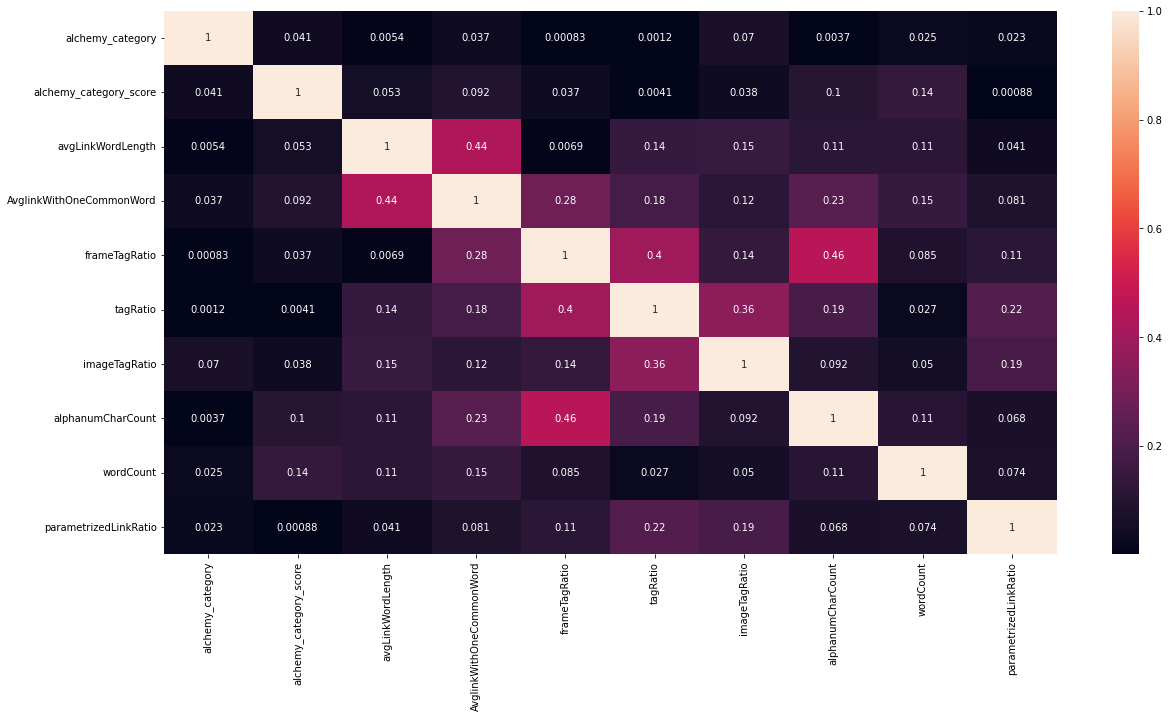

In [294]:
# Making Correlation Matrix Heat Map :-
plt.figure(figsize=(20,10))
plt.title = "Correlation Matrix"
sns.heatmap(abs(df[columns_after_coorelation].corr()), annot=True)
plt.show()


# Vectorization

In [295]:
tfidf_vect = TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', tokenizer=lambda x: re.findall(r'[^\p{p}\W+', x), analyzer=nlp_func, 
                                    token_pattern='(?u)\\b\\w\\w+\\b\\w{,1}',min_df=5, norm='l2', ngram_range=(1,2))

X_tfidf = tfidf_vect.fit_transform(df['webpageDescription']).toarray()
X_tfidf.shape

(7395, 22924)

In [296]:
tf_idf_df = pd.DataFrame(X_tfidf)
tf_idf_df.shape

(7395, 22924)

# Scaling and Merging with other features

In [297]:
df_new = df[columns_after_coorelation]
df_new.head()

,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,frameTagRatio,tagRatio,imageTagRatio,alphanumCharCount,wordCount,parametrizedLinkRatio
0,11,0.625616,1.916667,0.047619,0.027778,0.203161,0.552900,682.0,1.0,0.531746
1,11,0.625616,1.257576,0.141026,0.015086,0.168189,0.552900,3008.0,1.0,0.541771
2,9,0.386685,2.024000,0.630350,0.033935,0.192652,0.126582,11008.0,5.0,0.466926
3,7,0.475039,1.665254,0.419580,0.036530,0.198000,0.135593,4585.0,5.0,0.244755
4,2,0.535009,0.181818,0.036364,0.015152,0.241564,0.054217,1745.0,1.0,0.072727


In [298]:
df_scaled = StandardScaler().fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.shape

(7395, 10)

In [299]:
df_of_id_label = df_of_id_label.reset_index(drop=True)
df_all_features = pd.merge(df_scaled,df_of_id_label,left_index=True, right_index=True)
df_all_features.shape

(7395, 12)

In [300]:
# df_scaled = df_scaled.reset_index(drop=True)
# tf_idf_df = tf_idf_df.reset_index(drop=True)
df_final = pd.merge(df_all_features,tf_idf_df, left_index=True, right_index=True)
df_final.shape

(7395, 22936)

### Splitting the combined dataset

In [301]:
kaggle_train_df = df_final.loc[df_final["label"].isna() == False,:]
kaggle_test_df = df_final.loc[df_final["label"].isna(),:].drop(columns="label")
kaggle_train_df.shape, kaggle_test_df.shape

((5916, 22936), (1479, 22935))

# Splitting the Data

In [302]:
kaggle_train_df.drop(columns="id", inplace=True)
test_df = kaggle_test_df.drop("id", axis=1)

main_X = kaggle_train_df.drop("label", axis=1)
main_y = kaggle_train_df["label"]

train_X, test_X, train_y, test_y = model_selection.train_test_split(main_X, main_y, train_size=0.7, random_state=0)

# Models

## Logistic Regression Model

In [303]:
LR_model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='lbfgs', max_iter=10000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
LR_model.fit(train_X, train_y)

lr_probs = LR_model.predict_proba(test_X)[:, 1]
lr_auc = roc_auc_score(test_y, lr_probs)
lr_auc

0.8820226431194478

### Preparing Submission for Logistic Regression

In [304]:
LR_model.fit(main_X, main_y)
lr_probas = LR_model.predict_proba(test_df)[:, 1]

kaggle_test_df["label"] = lr_probas
to_submit = kaggle_test_df[["id", "label"]]
to_submit.to_csv("submission.csv", index=False)
to_submit.head()

,id,label
5916,7172,0.345243
5917,2687,0.745420
5918,6990,0.942016
5919,5639,0.498558
5920,2701,0.275465


## Random Forest Model

In [306]:
RF_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                        max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, 
                                            random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
RF_model.fit(train_X, train_y)

rf_probs = RF_model.predict_proba(test_X)[:, 1]
rf_auc = roc_auc_score(test_y, rf_probs)
rf_auc

0.8691309725163932

### Preparing Submission for Random Forest

In [307]:
RF_model.fit(main_X, main_y)
rf_probas = RF_model.predict_proba(test_df)[:, 1]

kaggle_test_df["label"] = rf_probas
to_submit = kaggle_test_df[["id", "label"]]
to_submit.to_csv("submission2.csv", index=False)
to_submit.head()

,id,label
5916,7172,0.33
5917,2687,0.82
5918,6990,0.93
5919,5639,0.54
5920,2701,0.34


## Naive Bayes Model

In [308]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(train_X, train_y)

nb_probs = NB_model.predict_proba(test_X)[:, 1]
nb_auc = roc_auc_score(test_y, nb_probs)
nb_auc

0.7328392531529198